In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from Simulator_new import Simulation

plt.rcParams.update({'font.size': 14})

data_loc = r'D:\Uni\Master\Mulitscale_methods\MD\Code\Data'
def dataloc(end: str):
    return rf'{data_loc}\{end}'

base_loc = r'D:\Uni\Master\Mulitscale_methods\MD\Tex\images'
def imloc(end: str):
    return rf'{base_loc}\{end}'

# 1

In [ ]:
np.random.seed(584390)
result = Simulation.run(t=2e2, steps=int(1e7), particles=2, save_every=10)
result.save(dataloc('1.npz'))

90% done

In [ ]:
result = Simulation.read(dataloc('1_1.npz'))
index = np.searchsorted(result.save_times > 2e1, 0.5)
# print(index)
result.plot(stop=index)
plt.tight_layout()
plt.savefig(imloc('3_1_3Dplot.png'))

result.plot_energy()
plt.tight_layout()
plt.savefig(imloc('3_1_energy.png'))
loc = result.total_particle_locations

plt.figure()
plt.plot(result.save_times, loc[:index, 0, 0], 'C0', linestyle='dotted', label='x1')
plt.plot(result.save_times, loc[:index, 0, 1], 'C0--', label='y1')
plt.plot(result.save_times, loc[:index, 0, 2], 'C0-', label='z1')
plt.plot(result.save_times, loc[:index, 1, 0], 'C1', linestyle='dotted', label='x2')
plt.plot(result.save_times, loc[:index, 1, 1], 'C1--', label='y2')
plt.plot(result.save_times, loc[:index, 1, 2], 'C1-', label='z2')
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('3_1_coordinates.png'))
plt.show()

plt.figure()
plt.plot(result.save_times[:index], result.total_energy[:index], 'C2-')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.tight_layout()
plt.savefig(imloc('3_1_totalenergy.png'))
plt.show()

result2 = Simulation.read(dataloc('1_1.npz'))
plt.figure()
plt.scatter(result2.total_particle_locations[:, 0, 0], result2.total_particle_velocities[:, 0, 0], s=0.001)
plt.scatter(result2.total_particle_locations[:, 0, 1], result2.total_particle_velocities[:, 0, 1], s=0.001)
plt.scatter(result2.total_particle_locations[:, 0, 2], result2.total_particle_velocities[:, 0, 2], s=0.001)
plt.xlabel('location')
plt.ylabel('velocity')
lines = [mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C0'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C1'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C2')]
plt.legend(lines, ['x', 'y', 'z'], loc='lower left')
plt.tight_layout()
plt.savefig(imloc('3_1_poicare.png'))
plt.show()

energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

# 2

In [90]:
np.random.seed(584390)
result = Simulation.run(t=1e2, steps=int(1e7), particles=3, save_every=10)
result.save(dataloc('2.npz'))

99% done


In [100]:
result = Simulation.read(dataloc('2.npz'))
energy_std = np.std(result.total_energy)
potential_std = np.std(result.potential)
kinetic_std = np.std(result.kinetic)
print(f'Kinetic std: {kinetic_std:.2e}')
print(f'Potential std: {potential_std:.2e}')
print(f'Energy std: {energy_std:.2e}')

Kinetic std: 3.41e-01
Potential std: 3.41e-01
Energy std: 2.38e-05


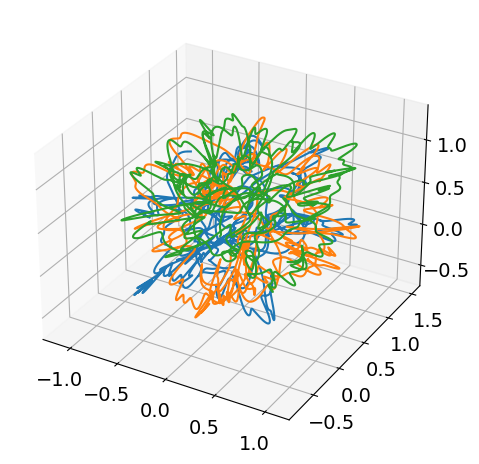

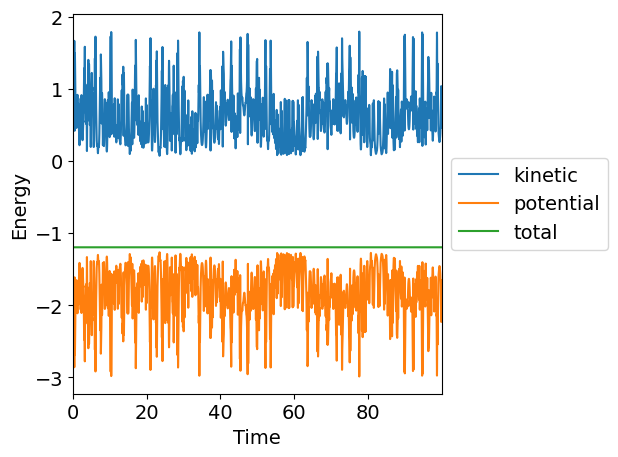

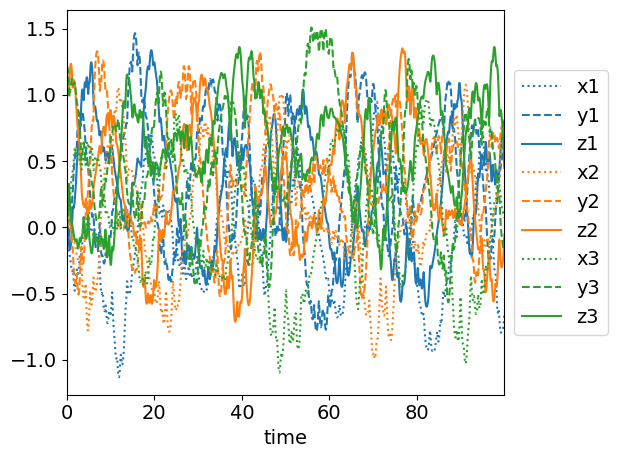

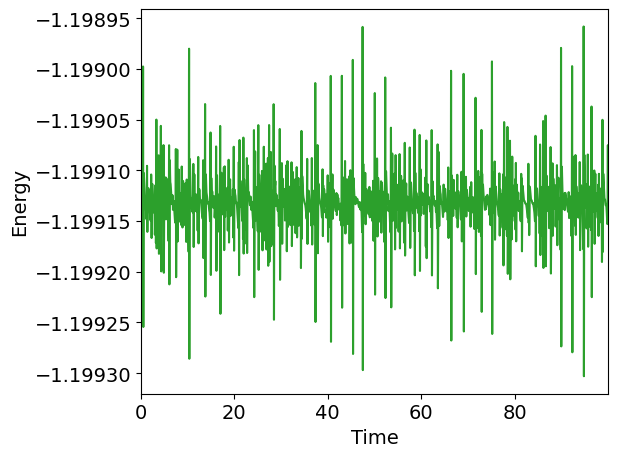

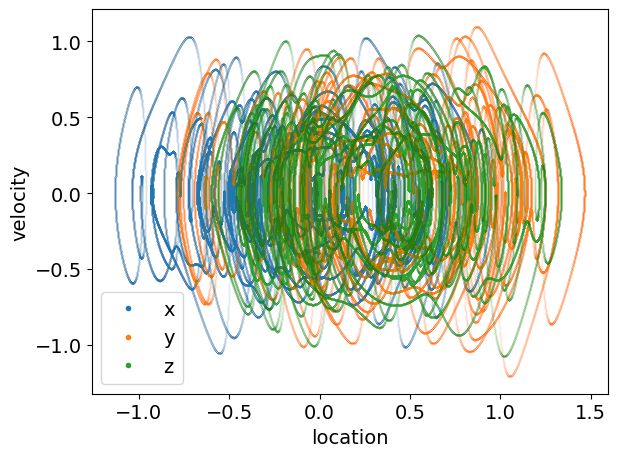

In [102]:
result.plot()
plt.tight_layout()
plt.savefig(imloc('3_2_3Dplot.png'))

result.plot_energy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(result.save_times[0], result.save_times[-1])
plt.tight_layout()
plt.savefig(imloc('3_2_energy.png'))
loc = result.total_particle_locations

plt.figure()
plt.plot(result.save_times, loc[:, 0, 0], 'C0', linestyle='dotted', label='x1')
plt.plot(result.save_times, loc[:, 0, 1], 'C0--', label='y1')
plt.plot(result.save_times, loc[:, 0, 2], 'C0-', label='z1')
plt.plot(result.save_times, loc[:, 1, 0], 'C1', linestyle='dotted', label='x2')
plt.plot(result.save_times, loc[:, 1, 1], 'C1--', label='y2')
plt.plot(result.save_times, loc[:, 1, 2], 'C1-', label='z2')
plt.plot(result.save_times, loc[:, 2, 0], 'C2', linestyle='dotted', label='x3')
plt.plot(result.save_times, loc[:, 2, 1], 'C2--', label='y3')
plt.plot(result.save_times, loc[:, 2, 2], 'C2-', label='z3')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(imloc('3_2_coordinates.png'))
plt.show()

plt.figure()
plt.plot(result.save_times, result.total_energy, 'C2-')
plt.xlim(result.save_times[0], result.save_times[-1])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.tight_layout()
plt.savefig(imloc('3_2_totalenergy.png'))
plt.show()

plt.figure()
plt.scatter(result.total_particle_locations[:, 0, 0], result.total_particle_velocities[:, 0, 0], s=0.0001)
plt.scatter(result.total_particle_locations[:, 0, 1], result.total_particle_velocities[:, 0, 1], s=0.0001)
plt.scatter(result.total_particle_locations[:, 0, 2], result.total_particle_velocities[:, 0, 2], s=0.0001)
plt.xlabel('location')
plt.ylabel('velocity')
lines = [mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C0'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C1'), mpl.lines.Line2D([0], [0], marker='.', linewidth=0, color='C2')]
plt.legend(lines, ['x', 'y', 'z'], loc='lower left')
plt.tight_layout()
plt.savefig(imloc('3_2_poicare.png'))
plt.show()


# 4

In [61]:
np.random.seed(584390)
result = Simulation.run(t=1e2, steps=int(3e6), particles=3, save_every=10, verlet_type='basic')
result.save(dataloc('3_simple_verlet.npz'))

np.random.seed(584390)
result = Simulation.run(t=1e2, steps=int(3e6), particles=3, save_every=10, verlet_type='velocity')
result.save(dataloc('3_velocity_verlet.npz'))

step 30000 of 3000000
step 60000 of 3000000
step 90000 of 3000000
step 120000 of 3000000
step 150000 of 3000000
step 180000 of 3000000
step 210000 of 3000000
step 240000 of 3000000
step 270000 of 3000000
step 300000 of 3000000
step 330000 of 3000000
step 360000 of 3000000
step 390000 of 3000000
step 420000 of 3000000
step 450000 of 3000000
step 480000 of 3000000
step 510000 of 3000000
step 540000 of 3000000
step 570000 of 3000000
step 600000 of 3000000
step 630000 of 3000000
step 660000 of 3000000
step 690000 of 3000000
step 720000 of 3000000
step 750000 of 3000000
step 780000 of 3000000
step 810000 of 3000000
step 840000 of 3000000
step 870000 of 3000000
step 900000 of 3000000
step 930000 of 3000000
step 960000 of 3000000
step 990000 of 3000000
step 1020000 of 3000000
step 1050000 of 3000000
step 1080000 of 3000000
step 1110000 of 3000000
step 1140000 of 3000000
step 1170000 of 3000000
step 1200000 of 3000000
step 1230000 of 3000000
step 1260000 of 3000000
step 1290000 of 3000000
step

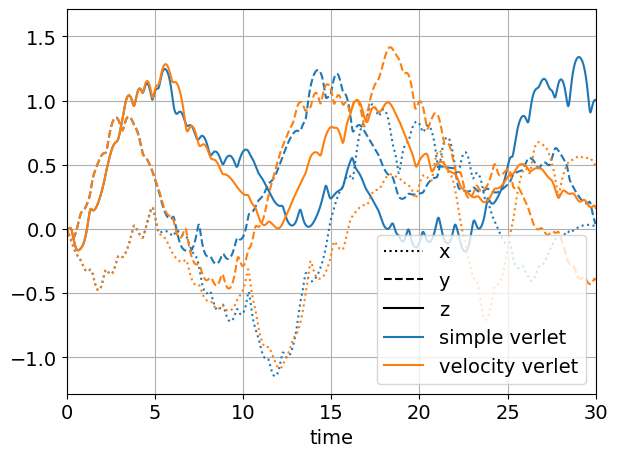

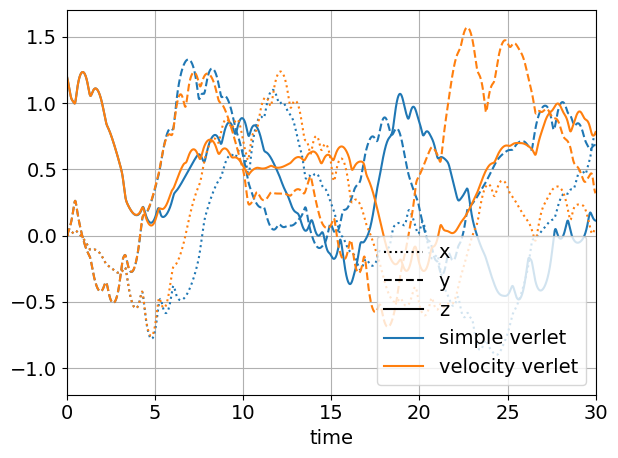

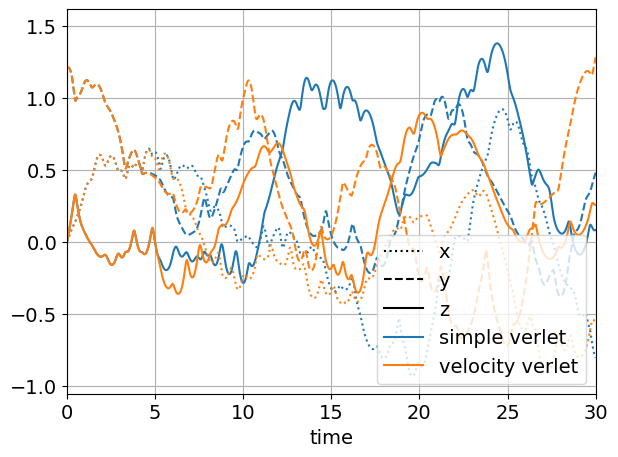

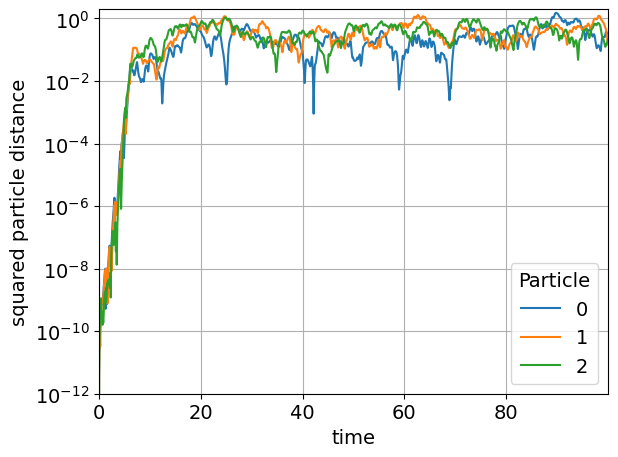

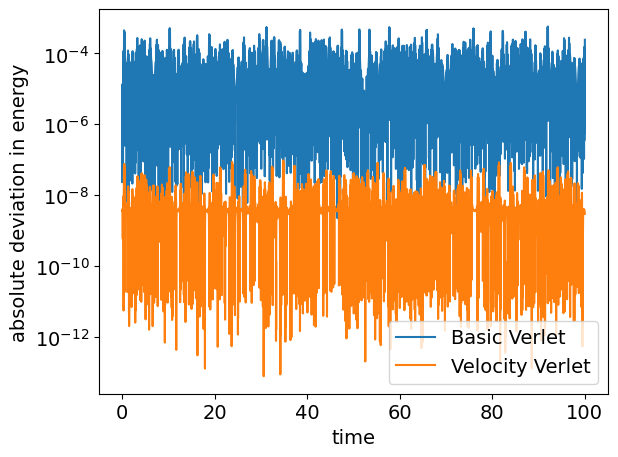

In [104]:
result_old = Simulation.read(dataloc('3_simple_verlet.npz'))
result_new = Simulation.read(dataloc('3_velocity_verlet.npz'))
time_range = (result_old.save_times[0], result_old.save_times[-1])

for i in range(3):
    plt.figure()
    plt.plot(result_old.save_times, result_old.total_particle_locations[:, i, 0], 'C0', linestyle='dotted')
    plt.plot(result_old.save_times, result_old.total_particle_locations[:, i, 1], 'C0', linestyle='dashed')
    plt.plot(result_old.save_times, result_old.total_particle_locations[:, i, 2], 'C0', linestyle='solid')
    plt.plot(result_new.save_times, result_new.total_particle_locations[:, i, 0], 'C1', linestyle='dotted')
    plt.plot(result_new.save_times, result_new.total_particle_locations[:, i, 1], 'C1', linestyle='dashed')
    plt.plot(result_new.save_times, result_new.total_particle_locations[:, i, 2], 'C1', linestyle='solid')

    lines = [mpl.lines.Line2D([0], [0], color='k', linestyle='dotted'), mpl.lines.Line2D([0], [0], color='k', linestyle='dashed'), mpl.lines.Line2D([0], [0], color='k', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C0', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C1', linestyle='solid')]
    plt.legend(lines, ['x', 'y', 'z', 'simple verlet', 'velocity verlet'], loc='lower right')
    plt.xlabel('time')
    plt.xlim(0, 30)
    plt.grid()
    plt.tight_layout()
    plt.savefig(imloc(f'3_3_coordinates_comparison_{i}.png'))
    plt.show()

plt.figure()
for i in range(3):
    values = np.average((result_old.total_particle_locations[:, i, :]-result_new.total_particle_locations[:, i, :])**2, axis=1)
    plt.semilogy(result_old.save_times, values, label=f'{i}')
plt.grid()
plt.legend(title='Particle')
plt.xlabel('time')
plt.ylabel('squared particle distance')
plt.ylim(1e-12, 2e0)
plt.xlim(*time_range)
plt.tight_layout()
plt.savefig(imloc(r'3_3_particle_distance.png'))
plt.show()

plt.figure()
plt.semilogy(result_old.save_times[1:], abs(result_old.total_energy[1:]-np.average(result_old.total_energy[1:])), label='Basic Verlet')
plt.semilogy(result_new.save_times[1:], abs(result_new.total_energy[1:]-np.average(result_new.total_energy[1:])), label='Velocity Verlet')
plt.xlabel('time')
plt.ylabel('absolute deviation in energy')
plt.legend()
plt.tight_layout()
plt.savefig(imloc(r'3_3_energy_deviation.png'))
plt.show()

In [66]:
mask = result_old.save_times > 20

print('Basic Verlet:')
print(f'Kinetic energy: {np.average(result_old.kinetic[mask]):.3e} ± {np.std(result_old.kinetic[mask]):.3e}')
print(f'Total energy: {np.average(result_old.total_energy[mask]):.3e} ± {np.std(result_old.total_energy[mask]):.3e}')

print('Velocity Verlet:')
print(f'Kinetic energy: {np.average(result_new.kinetic[mask]):.3e} ± {np.std(result_new.kinetic[mask]):.3e}')
print(f'Total energy: {np.average(result_new.total_energy[mask]):.3e} ± {np.std(result_new.total_energy[mask]):.3e}')

Basic Verlet:
Kinetic energy: 6.856e-01 ± 3.452e-01
Total energy: -1.199e+00 ± 8.301e-05
Velocity Verlet:
Kinetic energy: 6.489e-01 ± 3.273e-01
Total energy: -1.199e+00 ± 1.213e-08


# 5

In [45]:
samples = 25
save_points = 1e5
steps = np.logspace(4, 8, samples, dtype=int)
save_every_arr = (steps / save_points).astype(int)
save_every_arr[save_every_arr < 1] = 1
verlet_type = 'velocity'
time = 100
particles = 3


for step, save_every in zip(steps, save_every_arr):
    print(f'{step}, {save_every}')
    np.random.seed(57843920)
    sim = Simulation.run(time, step, particles, verlet_type=verlet_type, save_every=save_every)
    sim.save(dataloc(f'5_deltaE_v{verlet_type}_t{time}_p{particles}_s{sim.steps}_.npz'))


10000, 1
99% done
14677, 1
100% done
21544, 1
100% done
31622, 1
100% done
46415, 1
100% done
68129, 1
100% done
100000, 1
99% done
146779, 1
100% done
215443, 2
100% done
316227, 3
100% done
464158, 4
100% done
681292, 6
100% done
1000000, 10
99% done
1467799, 14
100% done
2154434, 21
100% done
3162277, 31
100% done
4641588, 46
100% done
6812920, 68
100% done
10000000, 100
99% done
14677992, 146
100% done
21544346, 215
100% done
31622776, 316
100% done
46415888, 464
100% done
68129206, 681
100% done
100000000, 1000
99% done


In [40]:
files = [dataloc(file) for file in os.listdir(dataloc('')) if file.startswith('5_deltaE_vbasic_t100_p3_s')]
samples = len(files)
delta_t = np.zeros(samples)
delta_E = np.zeros(samples)
steps = np.zeros(samples)
every = np.zeros(samples)
sims = []
measure_start = 20

for index, file in enumerate(files):
    sim = Simulation.read(file)
    sims.append(sim)
    steps[index] = sim.steps
    delta_t[index] = sim.times[-1] / sim.steps
    mask = sim.save_times > measure_start
    delta_E[index] = np.average(abs((sim.total_energy[mask]-np.median(sim.total_energy[mask])/np.median(sim.total_energy[mask]))))
    every[index] = sim.save_every

mask = np.argsort(delta_t)
steps = steps[mask]
delta_t = delta_t[mask]
delta_E = delta_E[mask]
every = every[mask]

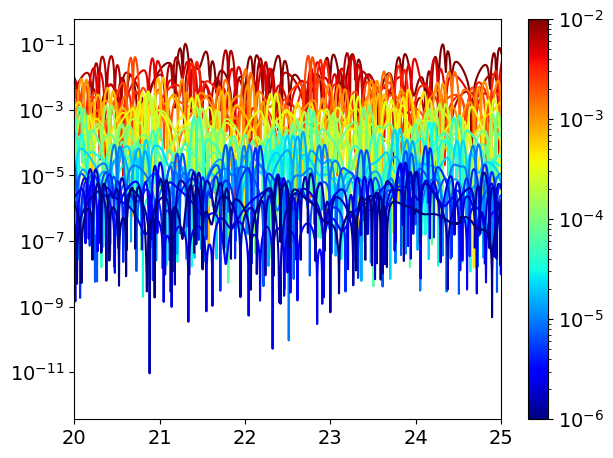

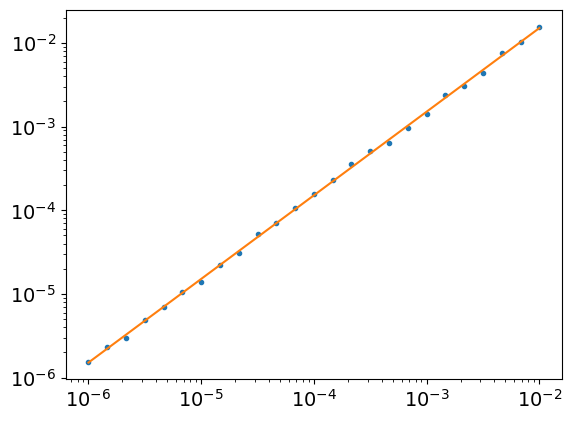

9.99729e-01 pm 4.46722e-03


In [44]:
cmap = mpl.cm.get_cmap('jet')
norm = mpl.colors.LogNorm(vmin=delta_t.min(), vmax=delta_t.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)


fig, ax = plt.subplots()
for index, dt in zip(mask, delta_t):
    sim = sims[index]
    mask_val = sim.save_times < 50
    plt.semilogy(sim.save_times[mask_val], (np.abs(sim.total_energy-sim.total_energy[0])/sim.total_energy[0])[mask_val], color=cmap(norm(dt)), label=sim.steps)
plt.colorbar(sm, label=r'$\Delta$t')
plt.xlim(20, 25)
plt.tight_layout()
plt.show()

fit, cov = np.polyfit(np.log(delta_t), np.log(delta_E), 1, cov=True)

plt.figure()
plt.loglog(delta_t, delta_E, '.')
plt.plot(delta_t, np.exp(fit[0]*np.log(delta_t) + fit[1]))
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$E')
plt.show()

print(f'{fit[0]:.5e} pm {np.sqrt(cov[0,0]):.5e}')

In [4]:
def extract_data(loc, measure_start, particles):
    files = []
    for file in os.listdir(dataloc('')):
        parts = file.split('_')
        if not file.startswith(loc):
            continue
        if not (int(parts[4][1:])==particles):
            continue
        files.append(file)

    seeds = set([])
    steps = set([])
    times = set([])

    for file in files:
        line = file.split('_')
        seeds.add(int(line[6].split('.')[0][2:]))
        steps.add(int(line[5][1:]))
        times.add(int(line[3][1:]))

    if len(times) != 1:
        raise NotImplementedError('Simulations with different lengths')
    sim_time = list(times)[0]
    seeds, dt = np.array(list(seeds)), sim_time/np.array(list(steps))
    delta_E1 = np.zeros((len(dt), len(seeds)))
    df = pd.DataFrame(delta_E1, index=dt, columns=seeds)

    for index, file in enumerate(files):
        sim = Simulation.read(dataloc(file))
        line = file.split('_')
        seed = int(line[6].split('.')[0][2:])
        mask = sim.save_times > measure_start

        plt.figure()
        plt.plot(sim.save_times, sim.total_particle_locations[:, 0, 0], 'C0', linestyle='dotted')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 0, 1], 'C0', linestyle='dashed')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 0, 2], 'C0', linestyle='solid')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 1, 0], 'C1', linestyle='dotted')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 1, 1], 'C1', linestyle='dashed')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 1, 2], 'C1', linestyle='solid')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 2, 0], 'C2', linestyle='dotted')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 2, 1], 'C2', linestyle='dashed')
        plt.plot(sim.save_times, sim.total_particle_locations[:, 2, 2], 'C2', linestyle='solid')
        lines = [mpl.lines.Line2D([0], [0], color='k', linestyle='dotted'), mpl.lines.Line2D([0], [0], color='k', linestyle='dashed'), mpl.lines.Line2D([0], [0], color='k', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C0', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C1', linestyle='solid'), mpl.lines.Line2D([0], [0], color='C1', linestyle='solid')]
        plt.legend(lines, ['x', 'y', 'z', 'particle 1', 'particle 2', 'particle 3'], loc='lower right')
        plt.xlabel('time')
        # plt.xlim(0, 30)
        plt.grid()
        plt.tight_layout()
        plt.savefig(imloc(rf'All trajectories\{seed}_{sim.verlet_type}_{sim.steps}.png'))
        plt.close()
        df[seed][sim_time/sim.steps] = np.average(np.abs((sim.total_energy[mask]/np.average(sim.total_energy[mask]) - 1)))
    return df

def fit(data_df: pd.DataFrame, max_dt):
    seeds = data_df.columns
    values = np.zeros((len(seeds), 4))
    fit_result = pd.DataFrame(values, index=seeds, columns=['a', 'a_err', 'b', 'b_err'])
    dt = data_df.index.to_numpy()
    mask = dt < max_dt
    for seed in seeds:
        series = data_df[seed].to_numpy()[mask]
        fit, cov = np.polyfit(np.log10(dt), np.log10(series), 1, cov=True)
        fit_result.loc[seed] = [fit[0], np.sqrt(cov[0,0]), fit[1], np.sqrt(cov[0,0])]
    fit, cov = np.polyfit(np.log10(dt), np.log10(data_df.to_numpy()[mask]), 1, cov=True)
    total = pd.DataFrame([fit[0], np.sqrt(cov[0,0]), fit[1], np.sqrt(cov[0,0])], index=['total'], columns=['a', 'a_err', 'b', 'b_err'])
    return pd.concat([fit_result, total])

In [ ]:
data_euler_3 = extract_data('5_deltaE_veuler', 20, 3)
data_basic_3 = extract_data('5_deltaE_vbasic', 20, 3)
data_velocity_3 = extract_data('5_deltaE_vvelocity', 20, 3)

In [ ]:
max_dt = 0.01
fit_euler = fit(data_euler_3, max_dt)
fit_basic = fit(data_basic_3, max_dt)
fit_velocity = fit(data_velocity_3, max_dt)

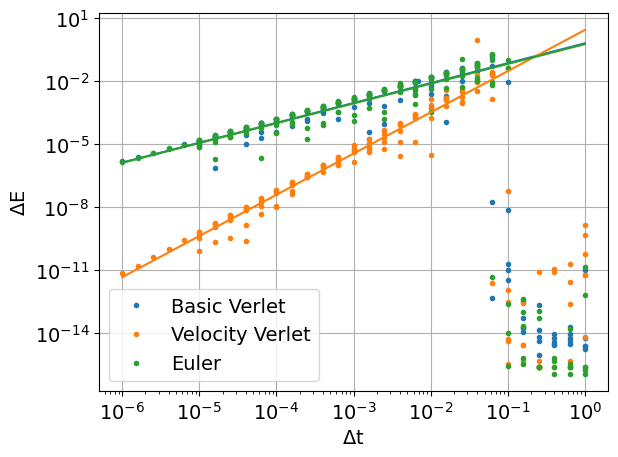

fit1: 0.94863 pm 0.04224
fit1: -0.46796 pm 0.37280
fit2: 1.96468 pm 0.03923
fit2: 0.99802 pm 0.34320
fit3: 0.94205 pm 0.03894
fit3: -0.55920 pm 0.34305
0.2362593364981695


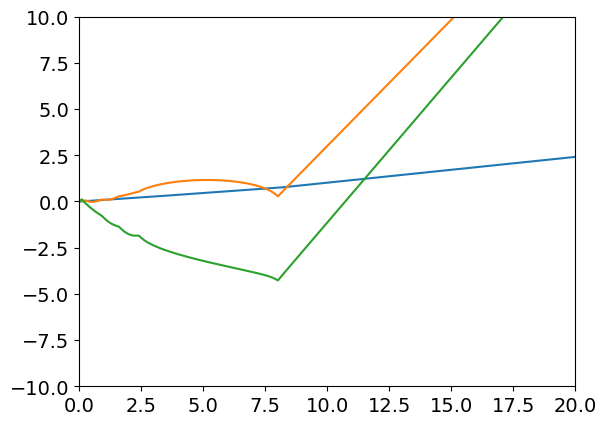

[1.49748661e-06 2.32508164e-06 3.71723884e-06 5.79976767e-06
 9.41050417e-06 1.05766354e-05 1.61865498e-05 1.32170117e-05
 9.04137634e-06 1.48489613e-05 2.36466900e-05 1.66403011e-05
 2.56515067e-05 7.34052989e-07 2.25495471e-05 3.68225371e-05
 2.02237339e-05 4.06543684e-05 2.29723509e-05 3.78611722e-05
 5.96455996e-05 9.70034404e-06 6.44323051e-05 6.23954177e-05
 2.75252248e-05 9.51398795e-05 1.81349243e-05 1.02118218e-04
 3.56699755e-05 9.70659117e-05 1.61846731e-04 1.00388996e-04
 1.49840350e-04 1.51744200e-04 3.78121799e-05 2.39769293e-04
 2.57122743e-04 2.56509220e-04 6.84917275e-05 2.35875220e-04
 3.84583500e-04 1.54219007e-04 1.27832940e-04 3.78037637e-04
 4.06540571e-04 4.14996208e-04 5.43756305e-04 5.89382982e-04
 6.44329163e-04 2.84112632e-04 9.30439455e-04 1.50968101e-04
 1.02119722e-03 3.18266599e-04 1.05611313e-03 1.35333947e-03
 5.60263432e-04 1.61850983e-03 1.29365924e-03 1.37151549e-03
 3.69491302e-05 2.48567961e-03 8.83171957e-04 2.56528379e-03
 2.19594153e-03 3.430396

In [148]:
def make_figure(data: pd.DataFrame, fit: pd.DataFrame):
    seeds = data.columns.to_numpy()
    dt = data.index.to_numpy()
    plt.figure()
    for index, seed in enumerate(seeds):
        plt.loglog(dt, data[seed], f'C{index}.')
        fit_values = fit.loc[seed]
        plt.loglog(dt, (10**fit_values['b'])*(dt**fit_values['a']), f'C{index}', label='seed')
    fit_values = fit.loc['total']
    plt.loglog(dt, (10**fit_values['b'])*(dt**fit_values['a']), f'C{index+1}', label='total fit')
    plt.legend()
    plt.xlabel(r'$\Delta$t')
    plt.ylabel(r'$\Delta$E')


make_figure(data_euler_3, fit_euler)
plt.title('euler')
plt.show()

make_figure(data_basic_3, fit_basic)
plt.title('basic')
plt.show()

make_figure(data_velocity_3, fit_velocity)
plt.title('velocity')
plt.show()

plt.figure()
plt.loglog(data_euler_3.index.to_numpy(), data_euler_3.to_numpy(), 'C0.', label='Euler')
plt.loglog(data_euler_3.index.to_numpy(), 10 ** fit_euler['total']['b'] * data_euler_3.index.to_numpy() ** fit_euler['total']['a'])
plt.loglog(data_basic_3.index.to_numpy(), data_basic_3.to_numpy(), 'C1.', label='Euler')
plt.loglog(data_basic_3.index.to_numpy(), 10 ** fit_basic['total']['b'] * data_basic_3.index.to_numpy() ** fit_basic['total']['a'])
plt.loglog(data_velocity_3.index.to_numpy(), data_velocity_3.to_numpy(), 'C2.', label='Euler')
plt.loglog(data_velocity_3.index.to_numpy(), 10 ** fit_velocity['total']['b'] * data_velocity_3.index.to_numpy() ** fit_velocity['total']['a'])
plt.legend()
plt.xlabel(r'$\Delta$t')
plt.ylabel(r'$\Delta$E')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
data_euler_10 = extract_data('5_deltaE_veuler', 20, 10)
data_basic_10 = extract_data('5_deltaE_vbasic', 20, 10)
data_velocity_10 = extract_data('5_deltaE_vvelocity', 20, 10)

In [ ]:
max_dt = 0.01
fit_euler = fit(data_euler_3, max_dt)
fit_basic = fit(data_basic_3, max_dt)
fit_velocity = fit(data_velocity_3, max_dt)